In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import math

In [2]:
df = pd.read_csv("./datasets/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

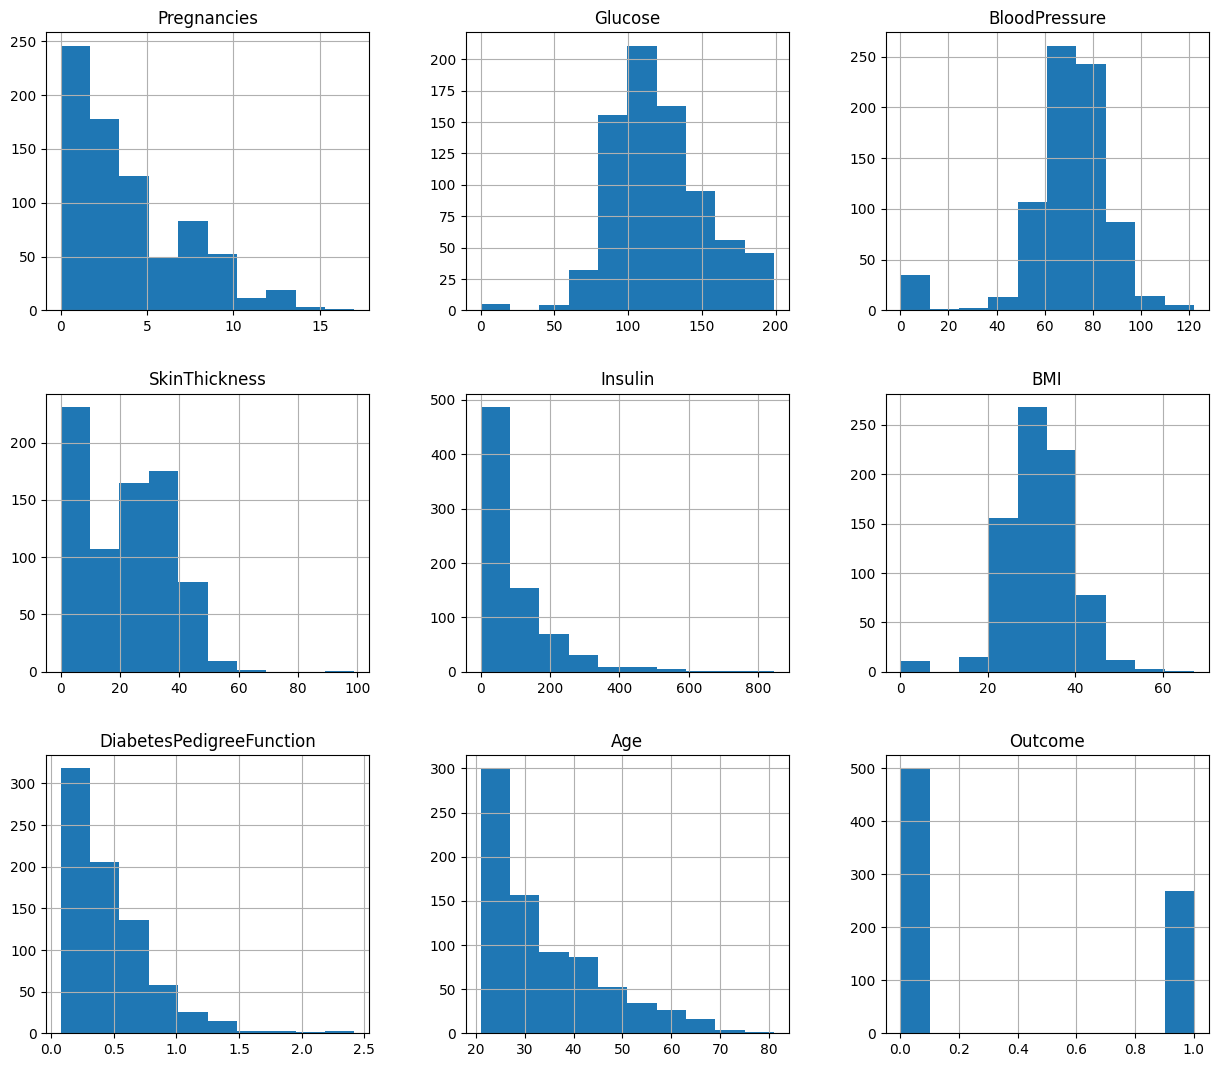

In [5]:
df.hist(figsize=(15,13))

In [6]:
x = df.iloc[:, :-1]
y = df["Outcome"]

In [8]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
data_x = x.values

In [16]:
data_x =  np.insert(data_x, 0, 1, axis=1)

In [17]:
data_x

array([[  1.   ,   6.   , 148.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,   1.   ,  85.   , ...,  26.6  ,   0.351,  31.   ],
       [  1.   ,   8.   , 183.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  1.   ,   5.   , 121.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   ,   1.   , 126.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,   1.   ,  93.   , ...,  30.4  ,   0.315,  23.   ]])

In [20]:
data_x.shape

(768, 9)

In [33]:
Weithts = np.ones((data_x.shape[1],))

In [31]:
Weithts

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
np.dot(Weithts, data_x[0])

346.22700000000003

In [41]:
result = [np.dot(Weithts, item) for item in data_x]

In [45]:
def sigmoid(x):
    return 1/(1 + math.exp(-x))

In [50]:
probabs = [sigmoid(i) for i in result]

In [52]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2)

In [53]:
math.exp(np.array(result[0]))

2.314598066063024e+150

In [54]:
x.shape

(768, 8)

In [55]:
lr = LogisticRegression(max_iter=1000)

In [56]:
lr.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

In [57]:
y_pred = lr.predict(test_x)

In [58]:
accuracy_score(test_y, y_pred)

0.7597402597402597

In [60]:
confusion_matrix(test_y, y_pred)

array([[87, 12],
       [25, 30]], dtype=int64)

In [69]:
sum([87, 30])/ (sum([87, 12, 25, 30]))

0.7597402597402597

<table>
<thead>
<tr>
<th>Actual \ Predicted</th>
<th>Positive</th>
<th>Negative</th>
</tr>
</thead>
<tbody>
<tr>
<td>Positive</td>
<td>TP</td>
<td>FN</td>
</tr>
<tr>
<td>Negative</td>
<td>FP</td>
<td>TN</td>
</tr>
</tbody>
</table>

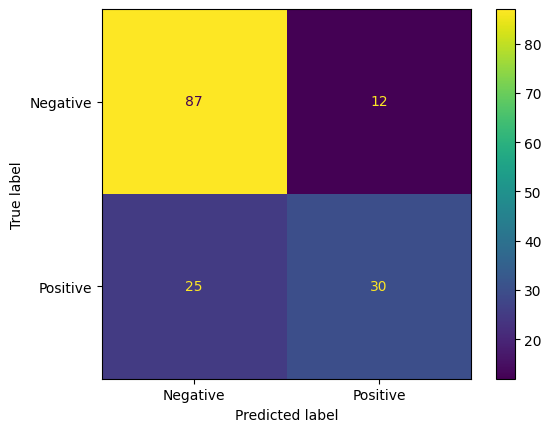

In [68]:
cfm_plot =  ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred), display_labels=["Negative", "Positive"])
cfm_plot.plot()